# STEP 5 - Central Model

Next, a central model is evaluated for the 4square dataset category prediction.

## Imports

In [143]:
import tensorflow as tf
from tensorflow import feature_column
import pandas as pd
import numpy as np
import import_ipynb

In [144]:
from model_helper import ModelHelper

## Central Model

This model is roughly the same model as tee second model used for the categories but in the following the prediction is analyzed manually in order to figure out which patterns are learnt.

In [145]:
df = pd.read_csv("./4square/processed_transformed.csv")
df.head(100)

,cat_id,user_id,clock_sin,clock_cos,day_sin,day_cos,month_sin,month_cos,week_day_sin,week_day_cos
0,0,470,-1.000000,0.000654,0.587785,0.809017,0.866025,-0.5,0.781831,0.62349
1,1,979,-0.999998,0.001818,0.587785,0.809017,0.866025,-0.5,0.781831,0.62349
2,2,69,-0.999945,0.010472,0.587785,0.809017,0.866025,-0.5,0.781831,0.62349
3,3,395,-0.999931,0.011708,0.587785,0.809017,0.866025,-0.5,0.781831,0.62349
4,4,87,-0.999914,0.013090,0.587785,0.809017,0.866025,-0.5,0.781831,0.62349
...,...,...,...,...,...,...,...,...,...,...
95,7,445,-0.959601,0.281365,0.587785,0.809017,0.866025,-0.5,0.781831,0.62349
96,6,235,-0.956326,0.292302,0.587785,0.809017,0.866025,-0.5,0.781831,0.62349
97,8,118,-0.955729,0.294249,0.587785,0.809017,0.866025,-0.5,0.781831,0.62349
98,2,1054,-0.955407,0.295291,0.587785,0.809017,0.866025,-0.5,0.781831,0.62349


In [146]:
# the number of different categories defines the vocabulary size
categories = df.cat_id
vocab_size = categories.nunique()

print('vocabulary size:', vocab_size)

vocabulary size: 27


Instantiate the ModelHelper and set the vocabulary size.

In [147]:
mh = ModelHelper(df, 17)
mh.set_vocab_size(vocab_size)

Set column names.

In [148]:
mh.set_target_column_name('cat_id')

# List of numerical column names
numerical_column_names = ['clock_sin', 'clock_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'week_day_sin', 'week_day_cos']
mh.set_numerical_column_names(numerical_column_names)

column_names = ['cat_id'] + numerical_column_names
mh.set_column_names(column_names)
mh.set_client_column_name('user_id')
mh.set_client_column_ids()

In [149]:
mh.create_users_locations_from_df()

100%|██████████| 1083/1083 [00:00<00:00, 2266.70it/s]


[       cat_id  user_id  clock_sin  clock_cos       day_sin   day_cos  \
 0           0      470  -1.000000   0.000654  5.877853e-01  0.809017   
 626        11      470  -0.102069   0.994777  5.877853e-01  0.809017   
 650        11      470  -0.057709   0.998333  5.877853e-01  0.809017   
 652        11      470  -0.055531   0.998457  5.877853e-01  0.809017   
 654        11      470  -0.053135   0.998587  5.877853e-01  0.809017   
 ...       ...      ...        ...        ...           ...       ...   
 60782       0      470  -1.000000   0.000800  7.431448e-01 -0.669131   
 64836      22      470  -0.966170  -0.257906  4.067366e-01 -0.913545   
 64980       0      470  -1.000000   0.000873  4.067366e-01 -0.913545   
 67196       0      470  -1.000000   0.000800  2.079117e-01 -0.978148   
 69288       0      470  -1.000000   0.000945  5.665539e-16 -1.000000   
 
        month_sin  month_cos  week_day_sin  week_day_cos  
 0       0.866025  -0.500000      0.781831      0.623490  
 626

The data was split in train, valid and test for each user.
Now, these are merged together again.
By doing it like this, it is ensured that the sequences are kept together and not split randomly for the users.

In [150]:
mh.concat_split_users_locations()

In [151]:
print(len(mh.df_train), 'train examples')
print(len(mh.df_val), 'validation examples')
print(len(mh.df_test), 'test examples')

144763 train examples
36729 validation examples
45936 test examples


Split the data.

In [152]:
#mh.split_data_sliding()
mh.split_data()
print(len(mh.list_test))
mh.list_test[0]

2703


,cat_id,clock_sin,clock_cos,day_sin,day_cos,month_sin,month_cos,week_day_sin,week_day_cos
31429,23,0.270320,0.962770,-0.994522,0.104528,0.866025,-0.5,0.000000,1.000000
31480,23,0.439613,0.898187,-0.994522,0.104528,0.866025,-0.5,0.000000,1.000000
31728,22,0.953323,-0.301954,-0.994522,0.104528,0.866025,-0.5,0.000000,1.000000
31729,22,0.952971,-0.303063,-0.994522,0.104528,0.866025,-0.5,0.000000,1.000000
31916,22,0.057782,-0.998329,-0.994522,0.104528,0.866025,-0.5,0.000000,1.000000
32041,22,-0.153561,-0.988139,-0.994522,0.104528,0.866025,-0.5,0.000000,1.000000
32044,22,-0.158086,-0.987425,-0.994522,0.104528,0.866025,-0.5,0.000000,1.000000
32045,22,-0.164976,-0.986298,-0.994522,0.104528,0.866025,-0.5,0.000000,1.000000
32052,22,-0.170066,-0.985433,-0.994522,0.104528,0.866025,-0.5,0.000000,1.000000
32055,22,-0.173147,-0.984896,-0.994522,0.104528,0.866025,-0.5,0.000000,1.000000


Create batch datasets.

In [153]:
mh.set_batch_size(16)
mh.create_and_batch_datasets(multi_target=False)

In [154]:
EMBEDDING_DIM = 256

rnn_units1 = 256
rnn_units2 = 128

# Create a model
def create_keras_model():

  vocab_size = mh.vocab_size
  N = mh.total_window_length
  batch_size = mh.batch_size
  # Shortcut to the layers package
  l = tf.keras.layers

  # List of numeric feature columns to pass to the DenseLayer
  numeric_feature_columns = []

  # Handling numerical columns
  for header in numerical_column_names:
		# Append all the numerical columns defined into the list
    numeric_feature_columns.append(feature_column.numeric_column(header, shape=N-1))

  feature_inputs={}
  for c_name in numerical_column_names:
    feature_inputs[c_name] = tf.keras.Input((N-1,), batch_size=batch_size, name=c_name)

  # We cannot use an array of features as always because we have sequences
  # We have to do one by one in order to match the shape
  num_features = []
  for c_name in numerical_column_names:
    f =  feature_column.numeric_column(c_name, shape=(N-1))
    feature = l.DenseFeatures(f)(feature_inputs)
    feature = tf.expand_dims(feature, -1)
    num_features.append(feature)

  # Declare the dictionary for the categories sequence as before
  sequence_input = {
      'cat_id': tf.keras.Input((N-1,), batch_size=batch_size, dtype=tf.dtypes.int32, name='cat_id') # add batch_size=batch_size in case of stateful GRU
  }

  # Handling the categorical feature sequence using one-hot
  cat_one_hot = feature_column.sequence_categorical_column_with_vocabulary_list(
      'cat_id', [i for i in range(vocab_size)])

  # Embed the one-hot encoding
  cat_embed = feature_column.embedding_column(cat_one_hot, EMBEDDING_DIM)

  # With an input sequence we can't use the DenseFeature layer, we need to use the SequenceFeatures
  sequence_features, sequence_length = tf.keras.experimental.SequenceFeatures(cat_embed)(sequence_input)

  input_sequence = l.Concatenate(axis=2)([sequence_features] + num_features)


  # Rnn
  recurrent = l.GRU(rnn_units1,
                    batch_size=batch_size, #in case of stateful
                    return_sequences=True,
                    stateful=True,
                    recurrent_initializer='glorot_uniform')(input_sequence)

  recurrent_2 = l.GRU(rnn_units2,
                      batch_size=batch_size, #in case of stateful
                      stateful=True,
                      recurrent_initializer='glorot_uniform')(recurrent)


  # Softmax output layer
  # Last layer with an output for each places
  output = l.Dense(vocab_size, activation='softmax')(recurrent_2)

	# To return the Model, we need to define its inputs and outputs
	# In out case, we need to list all the input layers we have defined
  inputs = list(feature_inputs.values()) + list(sequence_input.values())

	# Return the Model
  return tf.keras.Model(inputs=inputs, outputs=output)

In [155]:
mh.assign_model(create_keras_model())

In [156]:
mh.compile_model()
mh.fit_model()

Epoch 1/20
532/532 [==============================] - 6s 12ms/step - loss: 2.7394 - sparse_categorical_accuracy: 0.2375 - val_loss: 2.6842 - val_sparse_categorical_accuracy: 0.2435
Epoch 2/20
532/532 [==============================] - 6s 11ms/step - loss: 2.5657 - sparse_categorical_accuracy: 0.2702 - val_loss: 2.6594 - val_sparse_categorical_accuracy: 0.2491
Epoch 3/20
532/532 [==============================] - 5s 10ms/step - loss: 2.4776 - sparse_categorical_accuracy: 0.2869 - val_loss: 2.6744 - val_sparse_categorical_accuracy: 0.2431
Epoch 4/20
532/532 [==============================] - 6s 11ms/step - loss: 2.3766 - sparse_categorical_accuracy: 0.3093 - val_loss: 2.7190 - val_sparse_categorical_accuracy: 0.2375
Epoch 5/20
532/532 [==============================] - 5s 10ms/step - loss: 2.2184 - sparse_categorical_accuracy: 0.3433 - val_loss: 2.7959 - val_sparse_categorical_accuracy: 0.2287
Epoch 00005: early stopping


In [157]:
mh.evaluate_model()

168/168 [==============================] - 1s 4ms/step - loss: 2.6216 - sparse_categorical_accuracy: 0.2526


In [158]:
mh.model.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
clock_cos (InputLayer)          [(16, 16)]           0                                            
__________________________________________________________________________________________________
clock_sin (InputLayer)          [(16, 16)]           0                                            
__________________________________________________________________________________________________
day_cos (InputLayer)            [(16, 16)]           0                                            
__________________________________________________________________________________________________
day_sin (InputLayer)            [(16, 16)]           0                                            
_______________________________________________________________________________________

## Evaluation of the model prediction

A manual evaluation of the model prediction is executed.
An attempt is made to understand patterns that the model has learned to reach a good prediction quality.
In case of the original NYC dataset, the evaluation showed that in most cases the network simply predicts the taxi to not leave the current area.
As a result, a high prediction quality of around 30 percent could be reached.
With the 4square locations, a similar phenomenon could be seen.
The cincinnati dataset showed different results.
Here, driving patterns (routes) for each vehicle were figured out by the network.
It is interesting to see if the network can learn a pattern for the category prediction and whether that pattern is a simple or more complex one.

In [159]:
def print_info(T):
    print('Element #0:', T[0])
    print('Shape:', T.shape)

In [160]:
logits = mh.model.predict(mh.test_dataset)
print_info(logits)

Element #0: [0.22223406 0.01097394 0.0069177  0.01795245 0.01779116 0.02233752
 0.03173262 0.01376623 0.00879879 0.02495981 0.01183084 0.05943373
 0.00057486 0.00883546 0.00382042 0.00254684 0.00499253 0.0013614
 0.03382787 0.0014884  0.02870932 0.01858244 0.4340852  0.00530697
 0.00469263 0.00099513 0.00145174]
Shape: (2688, 27)


In [161]:
predictions = tf.nn.softmax(logits, axis=1)
print_info(predictions)

Element #0: tf.Tensor(
[0.04437905 0.03592766 0.03578222 0.03617926 0.03617342 0.03633825
 0.03668126 0.03602812 0.03584959 0.03643367 0.03595846 0.03771158
 0.03555598 0.03585091 0.03567156 0.03562617 0.0357134  0.03558395
 0.0367582  0.03558848 0.03657053 0.03620205 0.0548509  0.03572463
 0.03570269 0.03557093 0.03558717], shape=(27,), dtype=float32)
Shape: (2688, 27)


In [162]:
predicted_classes = np.argmax(predictions, 1)
print_info(predicted_classes)

Element #0: 22
Shape: (2688,)


In [163]:
actual_values = []
X_cat = []
for x, y in mh.test_dataset.unbatch():
    actual_values.append(y.numpy())
    X_cat.append(x['cat_id'].numpy())

actual_values = np.array(actual_values)
print(actual_values)
X_cat = np.array(X_cat)

diff = actual_values - predicted_classes
print(diff.shape)
unique, counts = np.unique(diff, return_counts=True)

print('actual_values')
print_info(actual_values)
print('predicted_classes')
print_info(predicted_classes)
print('diff')
print_info(diff)

[ 0 22  1 ... 24  3  1]
(2688,)
actual_values
Element #0: 0
Shape: (2688,)
predicted_classes
Element #0: 22
Shape: (2688,)
diff
Element #0: -22
Shape: (2688,)


In [164]:
wrong = np.count_nonzero(diff)
size = diff.shape[0]
correct =  size - wrong
acc = correct / size
print('# correct Predictions : ', correct)
print('# wrong Predictions : ', wrong)
print('accuracy: ', acc)

# correct Predictions :  677
# wrong Predictions :  2011
accuracy:  0.25186011904761907


In [165]:
res = pd.DataFrame(predicted_classes)
unique, counts = np.unique(res, return_counts=True)
print(unique)
print(counts)

[ 0  1  2  3  5  6  7  9 10 11 12 13 14 15 16 17 18 21 22 25 26]
[142  58 470   5  19  58 392 162   7 710   2 249   5  26  27  90  31  17
 186  12  20]


Not all classes were predicted.

In [166]:
res = pd.DataFrame(actual_values)
unique, counts = np.unique(res, return_counts=True)
print(unique)
print(counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
[172  83 312  71  66 129 116 312  49 191  21 369  17 151  50  42  55 102
  36  12  32  73 126  26  22  36  17]


The network preferred to predict the most dominant classes.

In [167]:
for i in range(0,20):
    print('Prediction #', i)
    print('Actual value: ', actual_values[i])
    print('Predicted value: ', predicted_classes[i])

Prediction # 0
Actual value:  0
Predicted value:  22
Prediction # 1
Actual value:  22
Predicted value:  0
Prediction # 2
Actual value:  1
Predicted value:  1
Prediction # 3
Actual value:  13
Predicted value:  14
Prediction # 4
Actual value:  2
Predicted value:  2
Prediction # 5
Actual value:  2
Predicted value:  2
Prediction # 6
Actual value:  21
Predicted value:  2
Prediction # 7
Actual value:  7
Predicted value:  7
Prediction # 8
Actual value:  2
Predicted value:  2
Prediction # 9
Actual value:  13
Predicted value:  13
Prediction # 10
Actual value:  11
Predicted value:  13
Prediction # 11
Actual value:  20
Predicted value:  11
Prediction # 12
Actual value:  5
Predicted value:  7
Prediction # 13
Actual value:  5
Predicted value:  7
Prediction # 14
Actual value:  2
Predicted value:  7
Prediction # 15
Actual value:  5
Predicted value:  7
Prediction # 16
Actual value:  2
Predicted value:  7
Prediction # 17
Actual value:  6
Predicted value:  7
Prediction # 18
Actual value:  7
Predicted va

In [168]:
Y = np.expand_dims(actual_values, -1)
print('X_cat.shape ', X_cat.shape)
print('Y.shape ', Y.shape)
X_Y = np.concatenate((X_cat, Y), axis=1)
print('X_Y.shape: ', X_Y.shape)
X_Y[:10]

X_cat.shape  (2688, 16)
Y.shape  (2688, 1)
X_Y.shape:  (2688, 17)


array([[23, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22,  0, 22,  0, 16, 22,
         0],
       [22,  0, 22,  0, 22,  0, 22,  0, 22,  0, 22,  0,  0,  0, 22,  0,
        22],
       [22,  0, 22,  0,  0,  0, 14,  1, 14, 14, 14,  1,  1, 18,  1, 14,
         1],
       [ 1, 14, 14,  1, 13, 14, 14,  1, 13, 14, 14,  1,  1, 13, 14, 14,
        13],
       [14, 14, 14,  1,  1, 13, 14, 14,  2,  2,  2,  2,  0,  0,  0,  2,
         2],
       [ 2,  2,  5,  7,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2, 20,  2,
         2],
       [ 2, 19,  2,  7, 19,  7,  2, 19,  1,  2,  7,  4, 19,  7,  7,  2,
        21],
       [ 2, 19, 11,  1,  4,  2,  2,  2, 19, 11, 19,  7,  7,  1,  2,  7,
         7],
       [ 2,  2,  2,  2,  2,  2,  7,  7,  4, 19,  2,  2,  2, 19,  7,  7,
         2],
       [ 1,  7,  7,  7, 11, 16,  2,  6, 22,  2,  0, 13,  7, 13, 11,  2,
        13]], dtype=int64)

In [169]:
columns = []
for i in range(0,16):
    columns.append('cat_' + str(i))
columns.append('y_true')
columns

['cat_0',
 'cat_1',
 'cat_2',
 'cat_3',
 'cat_4',
 'cat_5',
 'cat_6',
 'cat_7',
 'cat_8',
 'cat_9',
 'cat_10',
 'cat_11',
 'cat_12',
 'cat_13',
 'cat_14',
 'cat_15',
 'y_true']

In [170]:
df = pd.DataFrame(X_Y, columns = columns)
df

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,cat_10,cat_11,cat_12,cat_13,cat_14,cat_15,y_true
0,23,23,22,22,22,22,22,22,22,22,22,0,22,0,16,22,0
1,22,0,22,0,22,0,22,0,22,0,22,0,0,0,22,0,22
2,22,0,22,0,0,0,14,1,14,14,14,1,1,18,1,14,1
3,1,14,14,1,13,14,14,1,13,14,14,1,1,13,14,14,13
4,14,14,14,1,1,13,14,14,2,2,2,2,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,9,0,6,3,11,17,0,21,15,11,6,2,2,17,16,2,7
2684,3,5,2,7,2,7,7,2,7,11,3,17,11,0,3,6,3
2685,7,11,17,6,7,21,7,7,7,21,7,7,2,2,2,24,24
2686,2,12,2,15,17,12,0,10,13,17,20,2,22,3,0,21,3


In [171]:
df['y_pred'] = predicted_classes
df

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,cat_10,cat_11,cat_12,cat_13,cat_14,cat_15,y_true,y_pred
0,23,23,22,22,22,22,22,22,22,22,22,0,22,0,16,22,0,22
1,22,0,22,0,22,0,22,0,22,0,22,0,0,0,22,0,22,0
2,22,0,22,0,0,0,14,1,14,14,14,1,1,18,1,14,1,1
3,1,14,14,1,13,14,14,1,13,14,14,1,1,13,14,14,13,14
4,14,14,14,1,1,13,14,14,2,2,2,2,0,0,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,9,0,6,3,11,17,0,21,15,11,6,2,2,17,16,2,7,2
2684,3,5,2,7,2,7,7,2,7,11,3,17,11,0,3,6,3,11
2685,7,11,17,6,7,21,7,7,7,21,7,7,2,2,2,24,24,2
2686,2,12,2,15,17,12,0,10,13,17,20,2,22,3,0,21,3,0


In [172]:
df['correct'] = df['y_true'] - df['y_pred']

def reduce01 (val):
    if val == 0:
        return True
    else:
        return False

df['correct'] = df['correct'].map(reduce01)
df

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,cat_10,cat_11,cat_12,cat_13,cat_14,cat_15,y_true,y_pred,correct
0,23,23,22,22,22,22,22,22,22,22,22,0,22,0,16,22,0,22,False
1,22,0,22,0,22,0,22,0,22,0,22,0,0,0,22,0,22,0,False
2,22,0,22,0,0,0,14,1,14,14,14,1,1,18,1,14,1,1,True
3,1,14,14,1,13,14,14,1,13,14,14,1,1,13,14,14,13,14,False
4,14,14,14,1,1,13,14,14,2,2,2,2,0,0,0,2,2,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,9,0,6,3,11,17,0,21,15,11,6,2,2,17,16,2,7,2,False
2684,3,5,2,7,2,7,7,2,7,11,3,17,11,0,3,6,3,11,False
2685,7,11,17,6,7,21,7,7,7,21,7,7,2,2,2,24,24,2,False
2686,2,12,2,15,17,12,0,10,13,17,20,2,22,3,0,21,3,0,False


In [173]:
def fill_missing(df, matrix, column_name):
    columns = set(df['y_pred'].values) | set(df[column_name].values)
    columns = list(columns)
    matrix = matrix.reindex(columns = columns)
    matrix = np.transpose(matrix)
    matrix = matrix.reindex(columns = columns)
    matrix = np.transpose(matrix)
    matrix[np.isnan(matrix)] = 0
    return matrix

In [174]:
matrix = df.groupby(['y_pred', 'cat_15']).size().unstack(fill_value=0, level=0)
matrix = fill_missing(df, matrix, 'cat_15')
matrix

y_pred,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
cat_15,,,,,,,,,,,,,,,,,,,,,
0,64.0,0.0,30.0,0.0,0.0,0.0,1.0,9.0,0.0,8.0,...,1.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,1.0
1,3.0,24.0,18.0,0.0,0.0,1.0,0.0,11.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0
2,4.0,6.0,174.0,0.0,0.0,0.0,7.0,28.0,0.0,7.0,...,12.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0
3,3.0,4.0,15.0,5.0,0.0,0.0,6.0,7.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0
4,2.0,1.0,16.0,0.0,0.0,0.0,3.0,7.0,0.0,3.0,...,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
5,6.0,2.0,16.0,0.0,0.0,12.0,1.0,12.0,0.0,4.0,...,0.0,4.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
6,4.0,1.0,5.0,0.0,0.0,0.0,20.0,9.0,0.0,0.0,...,3.0,1.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
7,1.0,2.0,17.0,0.0,0.0,0.0,1.0,220.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0
8,2.0,1.0,9.0,0.0,0.0,2.0,2.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0


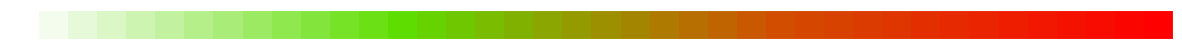

In [175]:
from colour import Color
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

def make_Ramp( ramp_colors ):

    color_ramp = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in ramp_colors ] )
    plt.figure( figsize = (15,3))
    plt.imshow( [list(np.arange(0, len( ramp_colors ) , 0.1)) ] , interpolation='nearest', origin='lower', cmap= color_ramp )
    plt.xticks([])
    plt.yticks([])
    return color_ramp

custom_ramp = make_Ramp( ['#ffffff', '#5ede00', '#d24e01', '#ff0000'] )

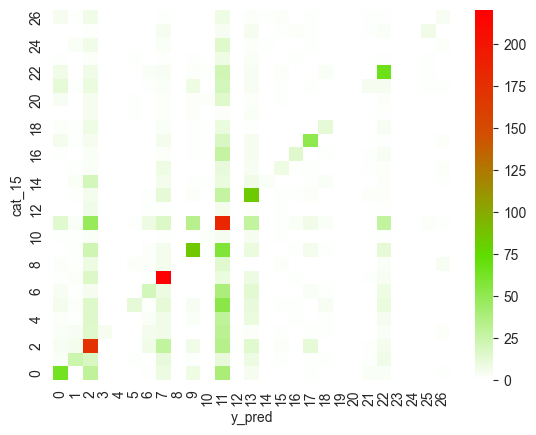

In [176]:
import seaborn as sns

ax = sns.heatmap(matrix,  cmap=custom_ramp)
ax.invert_yaxis()

The model apparently did not simply predict the user to visit the same type of location again.
Instead, it tried to learn a pattern.
For categories 2 and 7, it realized that these are visited multiple times in succession and predicts accordingly.
Thus, the tendency to predict the last visited location as the next remained.
A reason for this might be that the uber category definitions.
With broad categories such as restaurants or shopping, a behavior like becomes understandable.

In [177]:
matrix = df.groupby(['y_pred', 'cat_0']).size().unstack(fill_value=0, level=0)
matrix = fill_missing(df, matrix, 'cat_0')
matrix

y_pred,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
cat_0,,,,,,,,,,,,,,,,,,,,,
0,14.0,3.0,29.0,0.0,0.0,0.0,1.0,18.0,0.0,11.0,...,5.0,1.0,0.0,0.0,2.0,10.0,0.0,0.0,0.0,0.0
1,1.0,12.0,21.0,0.0,0.0,0.0,0.0,16.0,0.0,4.0,...,4.0,2.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0
2,13.0,4.0,133.0,0.0,0.0,2.0,3.0,41.0,0.0,14.0,...,16.0,2.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,4.0
3,6.0,0.0,11.0,2.0,0.0,0.0,4.0,11.0,0.0,2.0,...,2.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0
4,7.0,1.0,8.0,0.0,0.0,0.0,3.0,7.0,0.0,5.0,...,1.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,1.0,0.0
5,9.0,1.0,27.0,0.0,0.0,4.0,1.0,18.0,0.0,7.0,...,4.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0
6,6.0,1.0,14.0,0.0,0.0,0.0,6.0,14.0,0.0,5.0,...,4.0,3.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0
7,7.0,7.0,33.0,0.0,0.0,3.0,3.0,107.0,0.0,6.0,...,9.0,3.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
8,2.0,1.0,7.0,0.0,0.0,1.0,3.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0


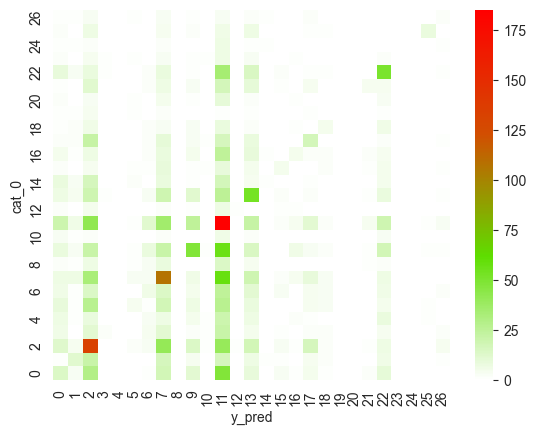

In [178]:
import seaborn as sns

ax = sns.heatmap(matrix,  cmap=custom_ramp)
ax.invert_yaxis()

Location categories 2 and 7 are very dominant.
Nonetheless, there is no direct correlation between the first location category in the sequence and the prediction.

In [179]:
matrix = df.groupby(['y_pred', 'y_true']).size().unstack(fill_value=0, level=0)
matrix = fill_missing(df, matrix, 'y_true')
matrix

y_pred,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
y_true,,,,,,,,,,,,,,,,,,,,,
0,33.0,2.0,27.0,1.0,0.0,2.0,5.0,18.0,0.0,9.0,...,6.0,0.0,0.0,0.0,3.0,9.0,0.0,0.0,1.0,0.0
1,4.0,19.0,16.0,0.0,0.0,0.0,1.0,13.0,0.0,0.0,...,3.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
2,13.0,4.0,135.0,0.0,0.0,0.0,6.0,41.0,0.0,16.0,...,4.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,3.0
3,4.0,0.0,14.0,1.0,0.0,1.0,2.0,13.0,0.0,5.0,...,5.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,4.0
4,5.0,1.0,9.0,0.0,0.0,0.0,3.0,6.0,0.0,4.0,...,2.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
5,10.0,0.0,24.0,0.0,0.0,3.0,3.0,17.0,0.0,6.0,...,2.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,1.0
6,5.0,0.0,11.0,0.0,0.0,0.0,15.0,11.0,0.0,6.0,...,4.0,1.0,0.0,0.0,1.0,13.0,0.0,0.0,1.0,0.0
7,6.0,5.0,52.0,0.0,0.0,5.0,5.0,132.0,0.0,13.0,...,8.0,3.0,0.0,0.0,0.0,12.0,0.0,0.0,3.0,2.0
8,1.0,3.0,14.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0


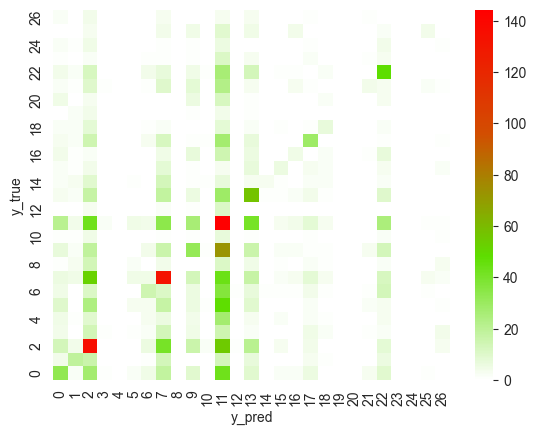

In [180]:
import seaborn as sns

ax = sns.heatmap(matrix,  cmap=custom_ramp)
ax.invert_yaxis()

The class 2 was predicted correctly in many cases.
The most wrong predictions can be found for class 7, which was the 2nd most frequent class.
This is expected and explains the high prediction quality.
The neural network for category prediction could learn more complex patterns for the 4square dataset than for the locations.